In [1]:
import sqlite3

In [2]:
import pandas as pd

In [51]:
with sqlite3.connect("../laliga.sqlite") as conn:
    df = pd.read_sql("SELECT * FROM Matches", con = conn)

df = df.loc[-df.score.isnull()]


In [52]:
df

,season,division,matchday,date,time,home_team,away_team,score
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2
...,...,...,...,...,...,...,...,...
48585,2021-2022,2,3,8/28/21,10:00 PM,Ponferradina,Girona,2:1
48586,2021-2022,2,3,8/29/21,5:00 PM,SD Amorebieta,UD Almería,2:1
48587,2021-2022,2,3,8/29/21,7:30 PM,CD Lugo,Real Valladolid,0:2
48588,2021-2022,2,3,8/29/21,7:30 PM,Real Sociedad B,CF Fuenlabrada,0:0


In [53]:
def parse_score(score_as_string):
        if score_as_string is None: 
            return None
        home_goals, away_goals = score_as_string.split(":")
        home_goals = int(home_goals)
        away_goals = int(away_goals)
        if home_goals > away_goals: 
            return "1"
        if away_goals > home_goals: 
            return "2" 
        else: 
            return "X"
        

In [54]:
df['result'] = df['score'].apply(parse_score)

<AxesSubplot:title={'center':'Result distribution'}, ylabel='result'>

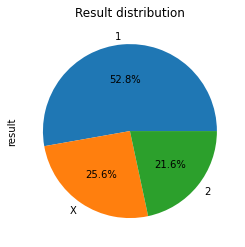

In [55]:
df["result"].value_counts().plot(kind="pie",title = "Result distribution",autopct='%1.1f%%')

# 2.exercise

In [60]:
df[['home_goals','away_goals']] = df['score'].str.split(":",expand=True,)
df = df.astype({"home_goals": int, "away_goals": int})
df

,season,division,matchday,date,time,home_team,away_team,score,result,home_goals,away_goals
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,2,2,3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,1,3,2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,1,5,0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,X,1,1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...
48585,2021-2022,2,3,8/28/21,10:00 PM,Ponferradina,Girona,2:1,1,2,1
48586,2021-2022,2,3,8/29/21,5:00 PM,SD Amorebieta,UD Almería,2:1,1,2,1
48587,2021-2022,2,3,8/29/21,7:30 PM,CD Lugo,Real Valladolid,0:2,2,0,2
48588,2021-2022,2,3,8/29/21,7:30 PM,Real Sociedad B,CF Fuenlabrada,0:0,X,0,0


In [66]:
goals_by_team_home = df.groupby("home_team")["home_goals"].sum()
goals_by_team_away = df.groupby("away_team")["away_goals"].sum()